In [1]:
#import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
#load dataset
df=pd.read_csv("BostonHousing.csv")
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#checking null values
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [4]:
#checking categories(datatype) of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [5]:
#Equation of MLR  :   Y_pred=m1X1+m2X2+m3X3+......+mnXn+b (y=mx+b)
#select input and output from dataset 
x=df[["crim","zn","indus","chas","nox","rm","age","dis","dis","rad","tax","ptratio","b","lstat"]]
y=df["medv"]

In [6]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [7]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [8]:
x_train.shape

(354, 14)

In [9]:
y_test.shape

(152,)

In [10]:
#importing LinearRegression
from sklearn.linear_model import LinearRegression

In [11]:
#creating object of LinearRegression
lr=LinearRegression()

In [12]:
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
#check slope/coefficient and intercept
lr.coef_

array([-9.85424717e-02,  6.07841138e-02,  5.91715401e-02,  2.43955988e+00,
       -2.14699650e+01,  2.79581385e+00,  3.57459778e-03, -7.58136092e-01,
       -7.58136092e-01,  3.07541745e-01, -1.12800166e-02, -1.00546640e+00,
        6.45018446e-03, -5.68834539e-01])

In [14]:
lr.intercept_

46.39649387182331

In [15]:
#testing the model
y_pred=lr.predict(x_test)

In [16]:
y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

In [17]:
y_test

307    28.2
343    23.9
47     16.6
67     22.0
362    20.8
       ... 
467    19.1
95     28.4
122    20.5
260    33.8
23     14.5
Name: medv, Length: 152, dtype: float64

In [18]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [19]:
#finding error in the model
mean_squared_error(y_test,y_pred)

19.831323672062858

In [20]:
#Evaluation of model
r2_score(y_test,y_pred)

0.7836295385076322

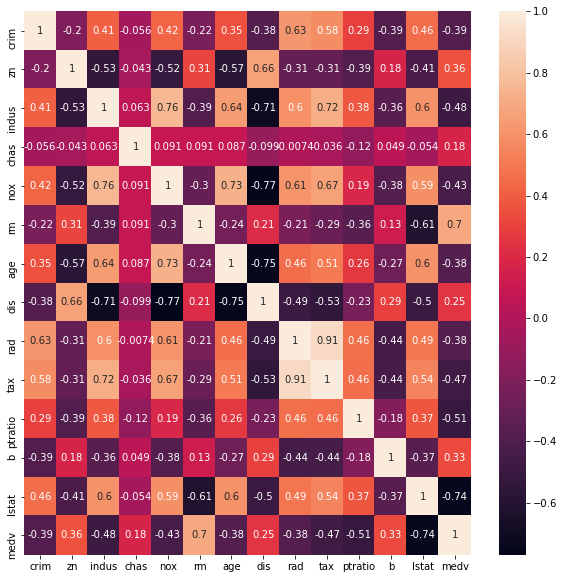

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
df.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

In [23]:
#Assumption of Linear Regression 
#1. there should be a linear relationship
#2. if occur linear relation then next check relation is homoskedastik 
#not a heteroskedastik

In [24]:
#find the residuals 
residual=y_test-y_pred
residual

307   -4.191465
343   -4.044013
47    -1.237628
67     0.330586
362    1.863604
         ...   
467    1.770041
95     0.039766
122   -0.294228
260    0.101843
23     0.981173
Name: medv, Length: 152, dtype: float64

In [25]:
y_pred

array([32.3914647 , 27.94401279, 17.83762764, 21.66941388, 18.93639614,
       20.01995795, 32.63414961, 17.86179976, 24.73211676, 26.77346826,
       27.26138023, 28.63243014, 21.16103038, 27.15098589, 23.33198614,
       21.02894005, 17.11819755, 37.52455938, 30.69864427,  8.46104486,
       20.83966032, 16.26732451, 25.05030307, 24.8069032 , 31.6789299 ,
       10.98989363, 13.54111562, 16.54697099, 35.86699683, 14.69589266,
       21.05655107, 13.90301353, 43.01321262, 17.80335305, 21.68817023,
       20.45077825, 17.38095983, 26.81334904, 10.08706217, 19.96174586,
       24.1983249 , 21.00202622, 29.38682967, 16.33215467, 19.37439646,
       14.45525235, 39.52670798, 18.18535021, 26.38536303, 20.41420863,
       25.08511581, 24.40208165, 24.87902769, 26.97887956,  4.93921657,
       24.0001365 , 10.66711602, 26.98494775, 16.63507993, 35.31652989,
       19.49249915, 27.37577863, 16.53965715, 19.09746715, 11.06765336,
       32.03445261, 36.15847648, 21.53547868, 24.96434626, 25.50

<AxesSubplot:ylabel='medv'>

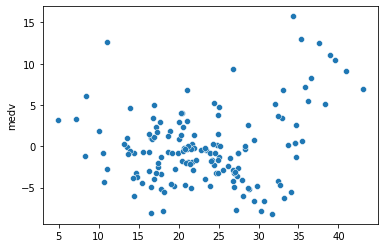

In [26]:
#visualize scatterplot between Y_pred and residuals means 
#here input x=Y_pred  and y=residuals because residuals depend on y_pred value
sns.scatterplot(y_pred,residual)

In [27]:
#Assumption1 :-checking multicolinearity 
#after finding correlation between inputs if they have correlation with each other or not
#if yes then check input with the output correlation value is more or not 
#if yes then there is no multicolinearity
#we found "rm","lstat"
x=df[[ 'rm','lstat',]]#input must be in [[]]
y=df["medv"]#output

In [28]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
x_train.shape

(354, 2)

In [30]:
x_test.shape

(152, 2)

In [31]:
#creating object 
lr=LinearRegression()

In [32]:
#training model
lr.fit(x_train,y_train)

LinearRegression()

In [33]:
#check slope means coefficient 
lr.coef_

array([ 4.12674118, -0.67762654])

In [34]:
#find intercept
lr.intercept_

5.3168184710960595

In [35]:
#testing dataset
y_pred=lr.predict(x_test)
y_pred

array([28.478341  , 28.08411889, 17.46168887, 24.08502818, 20.53939027,
       24.07720618, 29.49226779, 21.53814087, 17.73198767, 25.82822684,
       27.92749205, 30.56017902, 19.744675  , 22.25937394, 22.23039758,
       20.23997311, 17.00747983, 38.18522442, 25.71103246,  5.63483384,
       21.06717172, 17.25963598, 26.12875354, 27.64278875, 28.10950458,
       13.1207732 , 16.69050892, 22.99963249, 31.4303435 , 13.43144011,
       28.74647902, 15.93821689, 36.51949271, 19.97289731, 24.51189106,
       20.56294206, 19.42950819, 31.19888826,  6.57747007, 20.39686851,
       26.47769159, 26.7825762 , 27.47762993, 14.41499805, 18.62310619,
       18.06847281, 36.21261023, 18.53174991, 23.84655008, 24.54542564,
       26.22034649, 23.95166915, 28.32133001, 23.87204143,  6.22235564,
       27.39863295,  9.1580405 , 26.52852129, 20.09521683, 36.67342818,
       21.59540558, 28.25221122, 15.5348794 , 19.56003936,  7.62687753,
       30.70623418, 38.04772217, 26.44423625, 23.06709024, 21.58

In [36]:
y_pred

array([28.478341  , 28.08411889, 17.46168887, 24.08502818, 20.53939027,
       24.07720618, 29.49226779, 21.53814087, 17.73198767, 25.82822684,
       27.92749205, 30.56017902, 19.744675  , 22.25937394, 22.23039758,
       20.23997311, 17.00747983, 38.18522442, 25.71103246,  5.63483384,
       21.06717172, 17.25963598, 26.12875354, 27.64278875, 28.10950458,
       13.1207732 , 16.69050892, 22.99963249, 31.4303435 , 13.43144011,
       28.74647902, 15.93821689, 36.51949271, 19.97289731, 24.51189106,
       20.56294206, 19.42950819, 31.19888826,  6.57747007, 20.39686851,
       26.47769159, 26.7825762 , 27.47762993, 14.41499805, 18.62310619,
       18.06847281, 36.21261023, 18.53174991, 23.84655008, 24.54542564,
       26.22034649, 23.95166915, 28.32133001, 23.87204143,  6.22235564,
       27.39863295,  9.1580405 , 26.52852129, 20.09521683, 36.67342818,
       21.59540558, 28.25221122, 15.5348794 , 19.56003936,  7.62687753,
       30.70623418, 38.04772217, 26.44423625, 23.06709024, 21.58

In [37]:
#finding error
mean_squared_error(y_test,y_pred)

28.934491341086552

In [38]:
#evaluation of model
r2_score(y_test,y_pred)

0.6843090583339467

In [39]:
#2 assumption  : there should be linear relationship between input and output
#find the residual
residual=y_test-y_pred
residual

307   -0.278341
343   -4.184119
47    -0.861689
67    -2.085028
362    0.260610
         ...   
467    3.457352
95     0.249738
122    2.733521
260    5.256703
23    -1.334349
Name: medv, Length: 152, dtype: float64

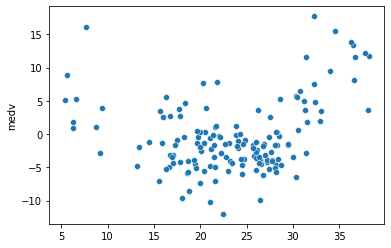

In [40]:
#visualize scatterplot between y_pred and residuals means 
sns.scatterplot(y_pred,residual)
plt.show()

In [41]:
# in above scatterplot, This is not a linear relation between Y_pred
#means this assumption is not fullfill
#3. Assumption :  if occur linear relation then next check relation is 
#homoskedastik not a heteroskedastik
#but dataset/model is heteroskedastik

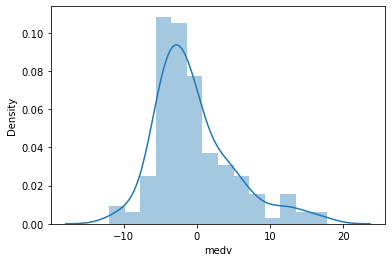

1.0962278513975559
-0.4827647633607489


In [42]:
#4. Assumption of linear regression : - Residuals should be normally distributed curve
#means data should be euqally divide on both sides.
plt.figure()
sns.distplot(residual)
plt.show()
from scipy.stats import skew
print(skew(residual))
print(np.mean(residual))

In [43]:
#In above distplot curve , +ve skewness found means no normal distributed curve
#found means it is a AS-symmetric curve means this assumption is not fullfill

In [44]:
#here we handled multicolinearity (removed multicolinearity (problem)
#but not working 3 assumption 
#means no relation relationship means here create a curve
##relation should be HOMOSKEDAStik : means datapoints are closely each other
#should not by Heteroskedastic  means should not be scattered
#if linear relationship occurs
# no normal distributed curve

In [45]:
#if increasing the degree or power of independent variable then It is called


In [46]:
#polynomial Linear regression(PLR) y=ax**2+bx+c
#it is also called quadratic equation
x=df[[ 'rm','lstat',]]
y=df["medv"]

In [47]:
#call PolynomialFeatures inbuilt class which define in sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

In [48]:
#create the object 
pf=PolynomialFeatures(2)#here 2 is a degree means pass how much degree 

In [49]:
#method of PolynomialFeatures class
x_poly=pf.fit_transform(x)

In [50]:
x_poly

array([[ 1.      ,  6.575   ,  4.98    , 43.230625, 32.7435  , 24.8004  ],
       [ 1.      ,  6.421   ,  9.14    , 41.229241, 58.68794 , 83.5396  ],
       [ 1.      ,  7.185   ,  4.03    , 51.624225, 28.95555 , 16.2409  ],
       ...,
       [ 1.      ,  6.976   ,  5.64    , 48.664576, 39.34464 , 31.8096  ],
       [ 1.      ,  6.794   ,  6.48    , 46.158436, 44.02512 , 41.9904  ],
       [ 1.      ,  6.03    ,  7.88    , 36.3609  , 47.5164  , 62.0944  ]])

In [51]:
#train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_poly,y,test_size=0.3,random_state=1)

In [52]:
x_train.shape

(354, 6)

In [53]:
y_test.shape

(152,)

In [54]:
#crearting object of the class
lr=LinearRegression()

In [55]:
#training the data
lr.fit(x_train,y_train)

LinearRegression()

In [56]:
#testing the data
y_pred=lr.predict(x_test)#y=mx+c

In [57]:
#finding the error
mean_squared_error(y_test,y_pred)

16.91540677390553

In [58]:
#r2_score greater than MLR
r2_score(y_test,y_pred)

0.8154437681254207

In [59]:
#work on assumption 
#create the Normal distributed curve with the help of residuals
#find residuals
residual=y_test-y_pred
residual

307   -0.156241
343   -4.012761
47     1.298496
67    -1.720117
362   -0.274472
         ...   
467    5.453297
95     0.263083
122    4.664637
260    5.685734
23     0.018817
Name: medv, Length: 152, dtype: float64

In [60]:
#skewness relatably close to zero 
skew(residual)

0.887930978901145

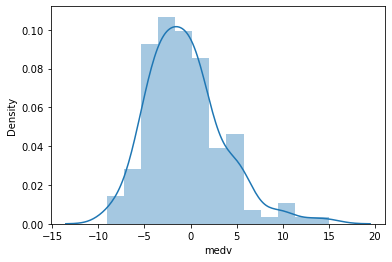

In [61]:
sns.distplot(residual)
plt.show()

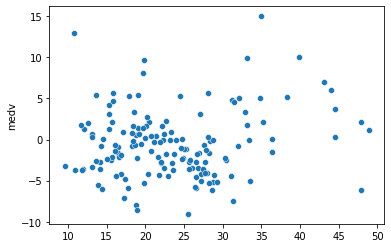

In [62]:
#next assumption 
#there should be a linear regression
#plot scatter plot 
sns.scatterplot(y_pred,residual)
plt.show()
